# Prediction of ROP (Rate of Penetration)

# **1. Import**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pickle
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Used for checking Distribution curve
from scipy.stats import skew

# **2. Read Data**

In [2]:
with zipfile.ZipFile("tech_challenge2021_train.zip","r") as zip_ref:
    zip_ref.extractall("datasets")
with zipfile.ZipFile("tech_challenge2021_test.zip","r") as zip_ref:
    zip_ref.extractall("datasets")

In [3]:
data = pd.read_csv('datasets/tech_challenge2021_train.csv')

# **3. Glimps Data**

In [4]:
data.sample(10)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
73197,USROP_A 3 N-SH-F-15d,1451.205,1.319954,22874.184690,8.989073,19.687032,119.640000,4430.976162,11.933929,444.5,125.382003,1415.350992,139.710
13825,USROP_A 1 N-S_F-7d,305.562,2.743037,9498.999788,3.130001,71.699997,183.000000,3435.189940,1.030000,444.5,96.230622,305.552246,33.831
71916,USROP_A 3 N-SH-F-15d,1417.472,1.147589,23018.216170,7.985768,13.414248,99.610000,4453.120823,11.933929,444.5,124.633575,1384.554000,160.690
120082,USROP_A 3 N-SH-F-15d,4025.798,15.852146,16366.485280,34.002558,34.886189,139.736000,2077.184268,11.349751,215.9,135.112920,3158.685682,53.356
68628,USROP_A 3 N-SH-F-15d,1351.913,5.130130,20160.684010,13.002294,14.935200,59.000000,3987.855834,12.017384,444.5,118.841201,1325.212488,73.360
14097,USROP_A 1 N-S_F-7d,322.786,1.957855,14291.000370,1.690000,96.879997,212.000000,4427.240233,1.030000,444.5,98.025317,322.777104,67.662
23245,USROP_A 2 N-SH_F-14d,1137.684,5.557453,12922.999570,7.190000,24.250000,119.889999,3959.219972,1.190000,444.5,104.908401,1137.194474,119.199
42230,USROP_A 2 N-SH_F-14d,2209.431,1.397011,19777.000430,8.020001,10.290000,119.300003,4427.839843,1.310000,444.5,148.898966,2208.668582,34.878
143409,USROP_A 4 N-SH_F-15Sd,2956.100,1.224699,15966.051570,11.538011,8.327136,217.560000,1794.550267,1.320000,215.9,135.156919,2612.460917,30.090
103864,USROP_A 3 N-SH-F-15d,3175.845,0.140614,14830.829780,18.764520,62.804040,139.736000,2077.169127,11.182843,215.9,133.882324,2813.406718,21.313


In [5]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


# **4. Exploratory Data Analysis**

In [6]:
# remove all rows that contains missing value
data.replace(['-999', -999], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


<b>The above table shows that the there is considerable difference between the values between mean and 50% percentile of the data. This shows that the data is not distributed evenly.</b>

In [7]:
#Checking for any missing or nan values
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [8]:
# Identifying the numbers of unique wells whose data has been used
wells = data['Well Identifier'].unique()
wells

array(['USROP_A 0 N-NA_F-9_Ad', 'USROP_A 1 N-S_F-7d',
       'USROP_A 2 N-SH_F-14d', 'USROP_A 3 N-SH-F-15d',
       'USROP_A 4 N-SH_F-15Sd', 'USROP_A 5 N-SH-F-5d',
       'USROP_A 6 N-SH_F-9d'], dtype=object)

In [9]:
len(wells)

7

In [10]:
data.columns.tolist()

['Well Identifier',
 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

In [11]:
data.skew(axis = 0, skipna = True)

Measured Depth m                 -0.345659
Weight on Bit kkgf                0.906045
Average Standpipe Pressure kPa   -0.129656
Average Surface Torque kN.m       0.529987
Rate of Penetration m/h           0.998834
Average Rotary Speed rpm          0.457813
Mud Flow In L/min                 0.322860
Mud Density In g/cm3              1.062461
Diameter mm                       0.626293
Average Hookload kkgf            -1.118999
Hole Depth (TVD) m               -0.690687
USROP Gamma gAPI                  0.903386
dtype: float64

<b>Skewness of the data shows us that Data Distribution Curve is not properly distributed.</b>

## Visualizing Data Distribution Curve

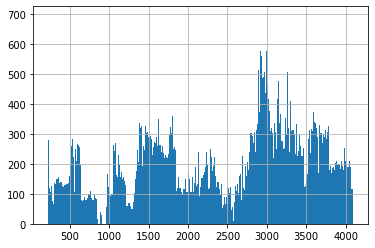

In [12]:
data['Measured Depth m'].hist(bins = 1000)

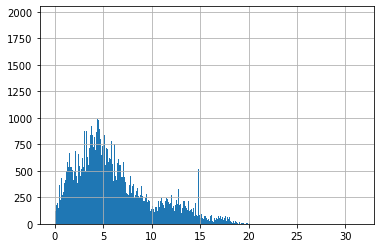

In [13]:
data['Weight on Bit kkgf'].hist(bins = 1000)

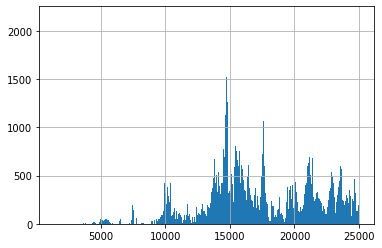

In [14]:
data['Average Standpipe Pressure kPa'].hist(bins = 1000)

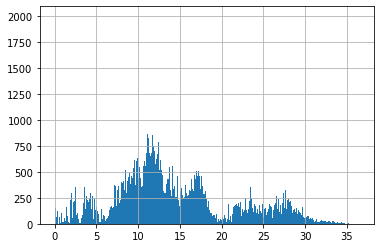

In [15]:
data['Average Surface Torque kN.m'].hist(bins = 1000)

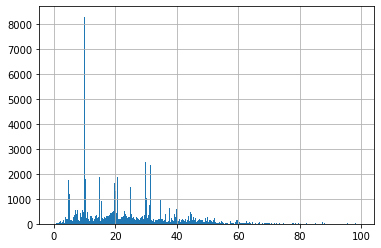

In [16]:
data['Rate of Penetration m/h'].hist(bins = 1000)

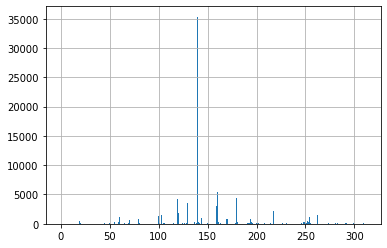

In [17]:
data['Average Rotary Speed rpm'].hist(bins = 1000)

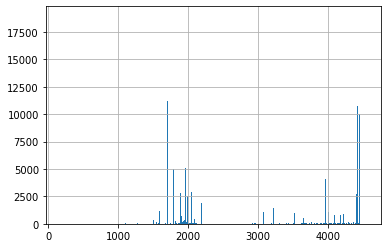

In [18]:
data['Mud Flow In L/min'].hist(bins = 1000)

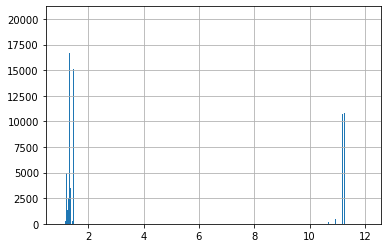

In [19]:
data['Mud Density In g/cm3'].hist(bins = 1000)

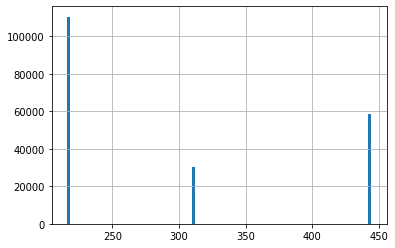

In [20]:
data['Diameter mm'].hist(bins = 100)

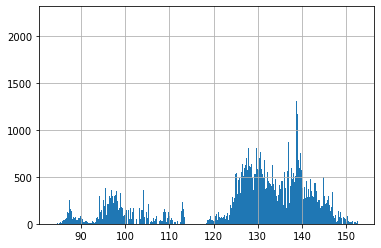

In [21]:
data['Average Hookload kkgf'].hist(bins = 1000)

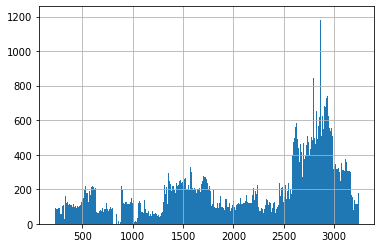

In [22]:
data['Hole Depth (TVD) m'].hist(bins = 1000)

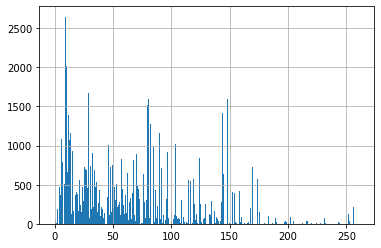

In [23]:
data['USROP Gamma gAPI'].hist(bins = 1000)

## Data Scaling
<b>This brings us to the possibility of using different scalers to scale our data.</b>
<ol>
    <li>StandardScaler</li>
    <li>MinMaxScaler</li>
    <li>MaxAbsScaler</li>
    <li>RobustScaler</li>
    <li>Quartile Transformer</li>
    <li>PowerTransformer (Yeo-Johnson and Box-Cox)</li>
</ol>

<b>We eliminate the use of RobustScaler and QuartileTransformer since they balance out data by adding or removing outliers which may affect our data and the relation between our columns since ROP is highly variable.</b>

<b>We also rule out the use of Box-Cox Power Transformer since our data rows has 0 values on which Box-Cox won't work.</b>

This leaves us with possible transforms -
<ol>
    <li>StandardScaler</li>
    <li>MinMaxScaler</li>
    <li>MaxAbsScaler</li>
    <li>PowerTransformer (Yeo-Johnson)</li>
</ol>

## Visualizing Relation between Columns

### Look at some log curves for a couple of wells

(1205.999, 491.033)

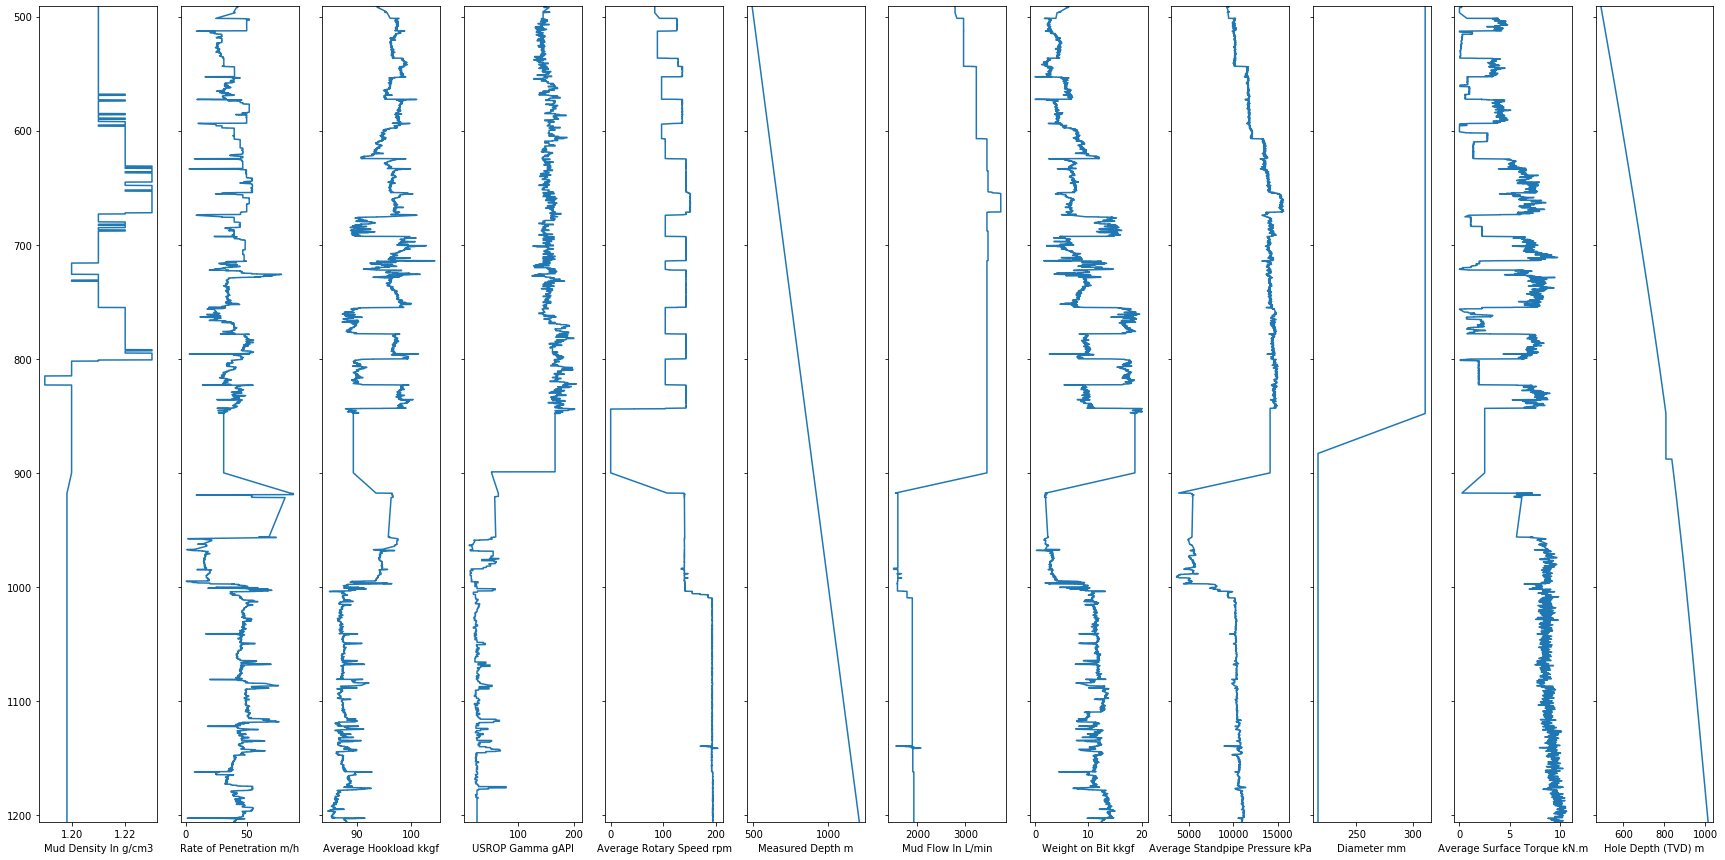

In [24]:
well_data = data[data['Well Identifier'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(633.536, 301.231)

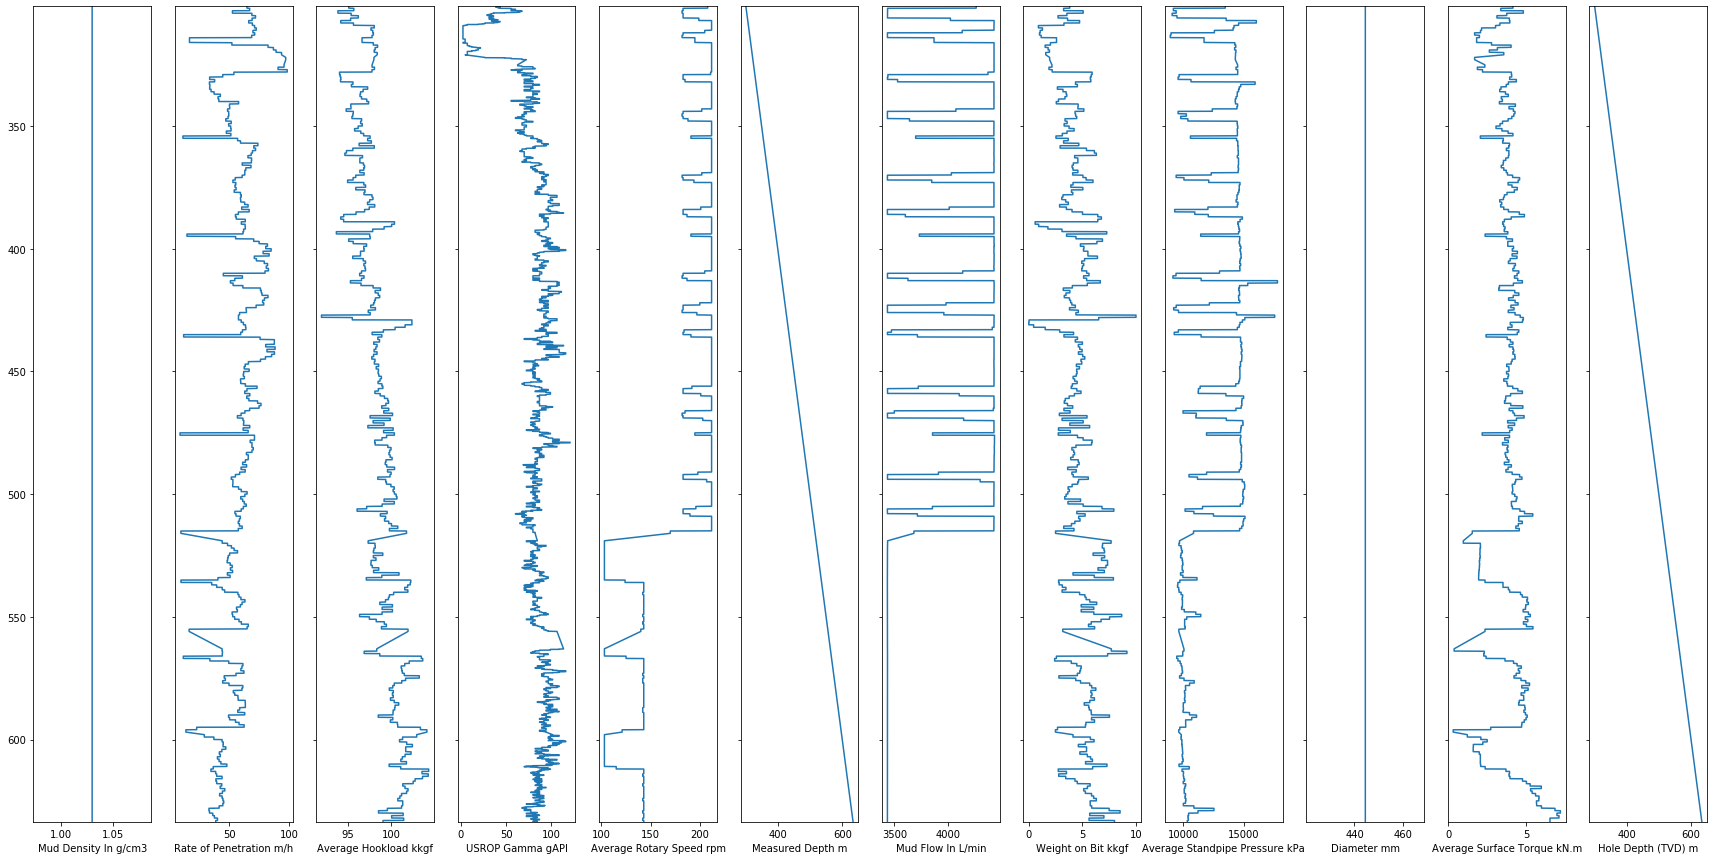

In [25]:
well_data = data[data['Well Identifier'] == wells[1]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(3466.033, 987.948)

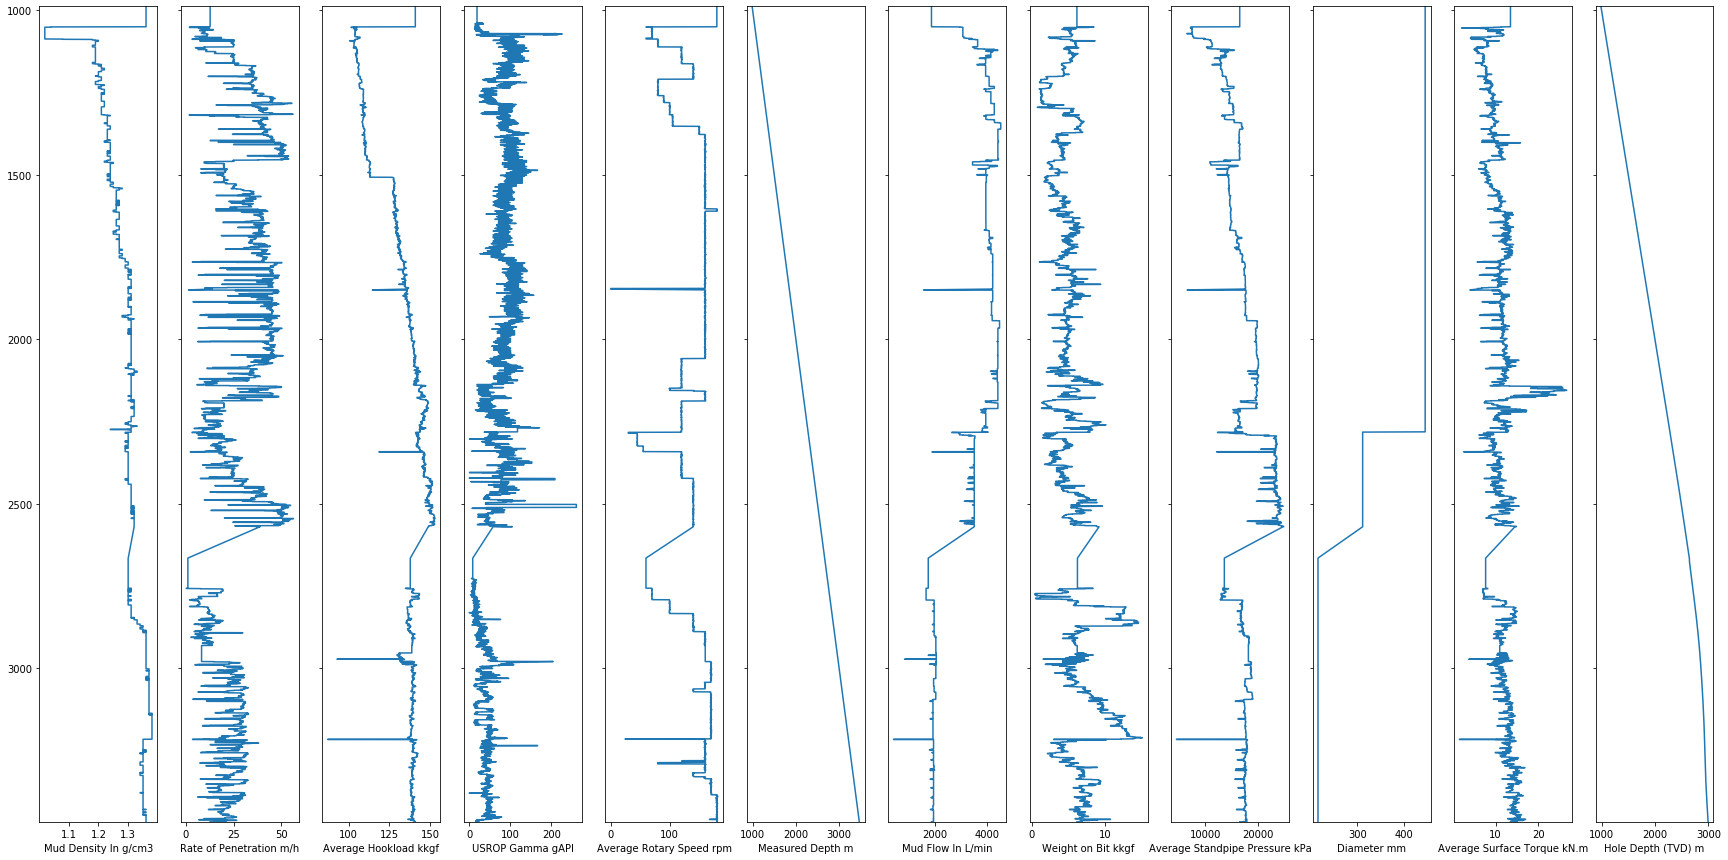

In [26]:
well_data = data[data['Well Identifier'] == wells[2]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(4065.3459999999995, 1306.525)

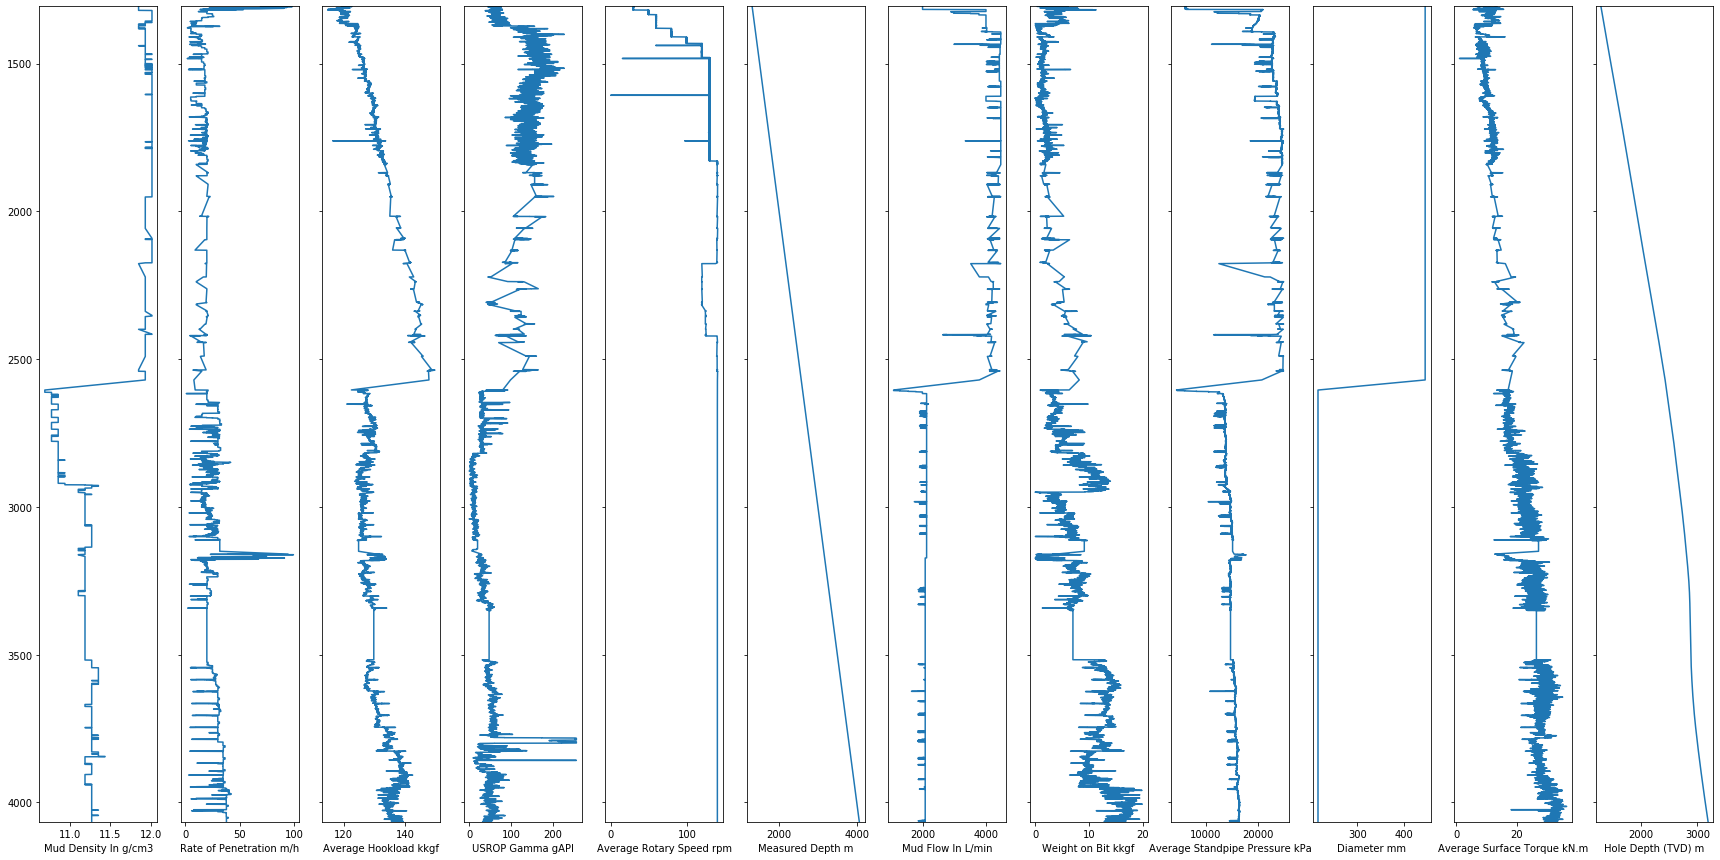

In [27]:
well_data = data[data['Well Identifier'] == wells[3]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(4090.0009999999997, 1400.55)

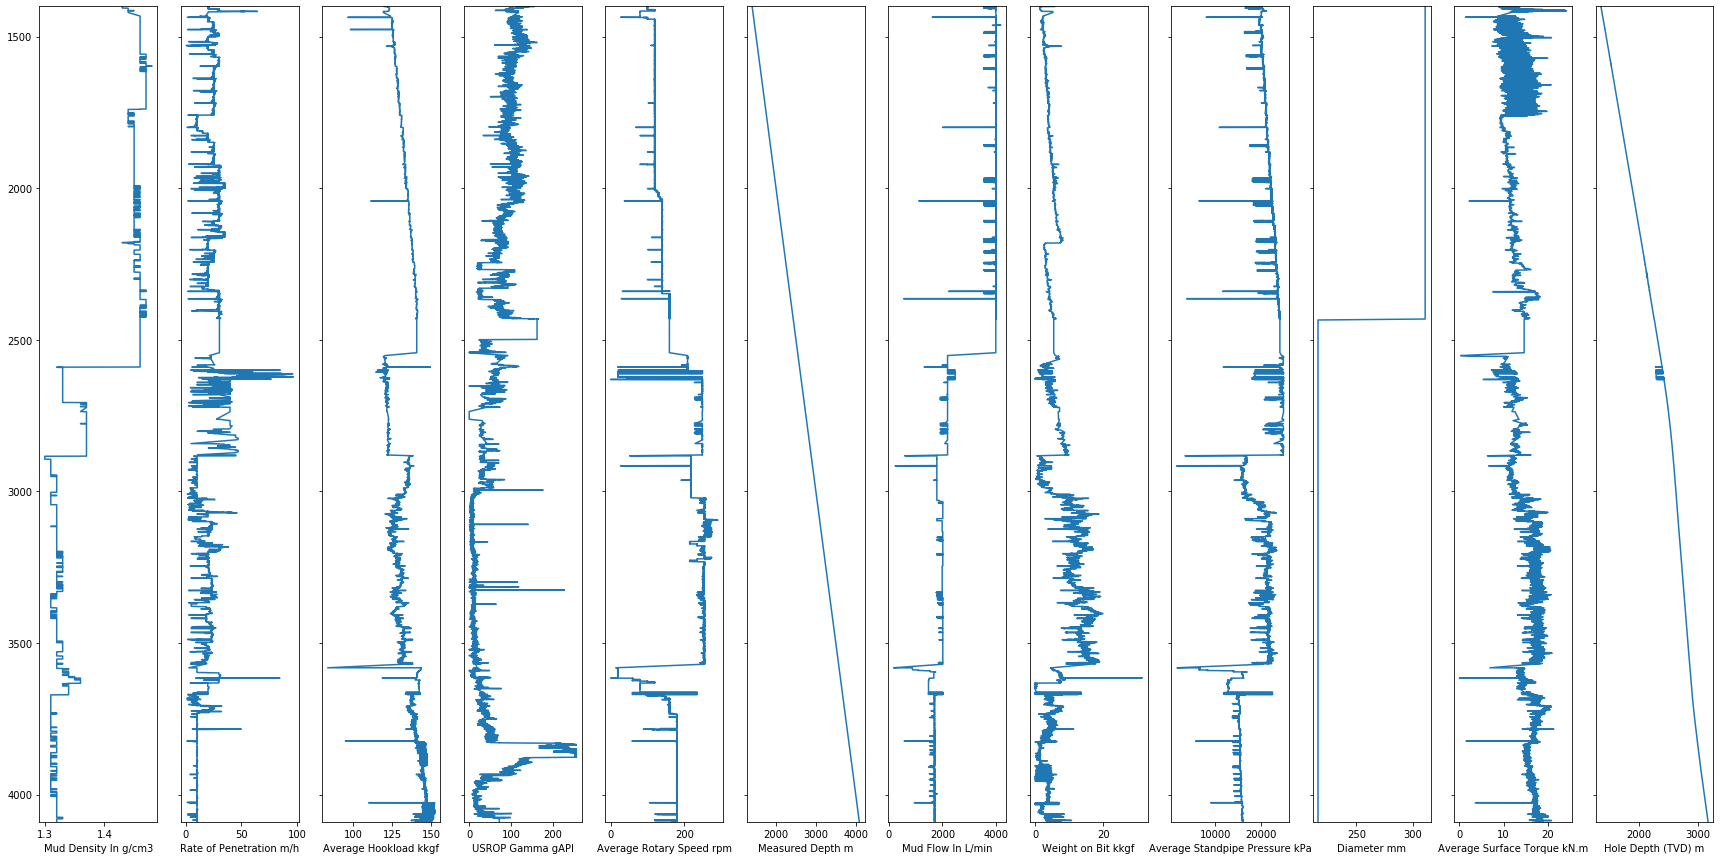

In [28]:
well_data = data[data['Well Identifier'] == wells[4]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(3792.2, 2828.239)

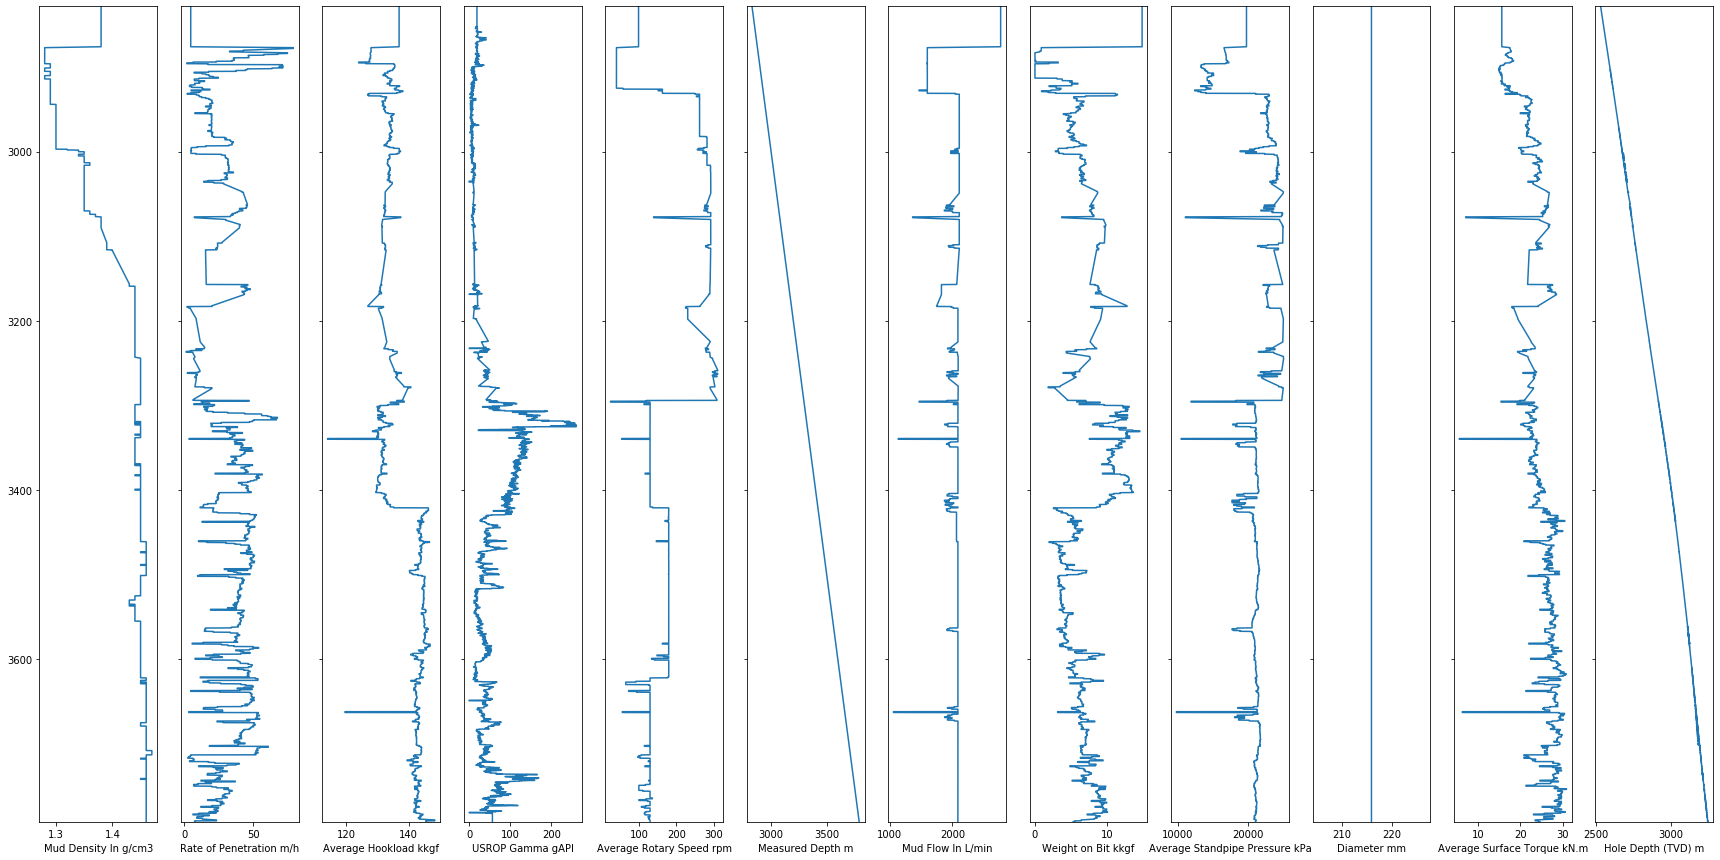

In [29]:
well_data = data[data['Well Identifier'] == wells[5]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

(633.536, 225.171)

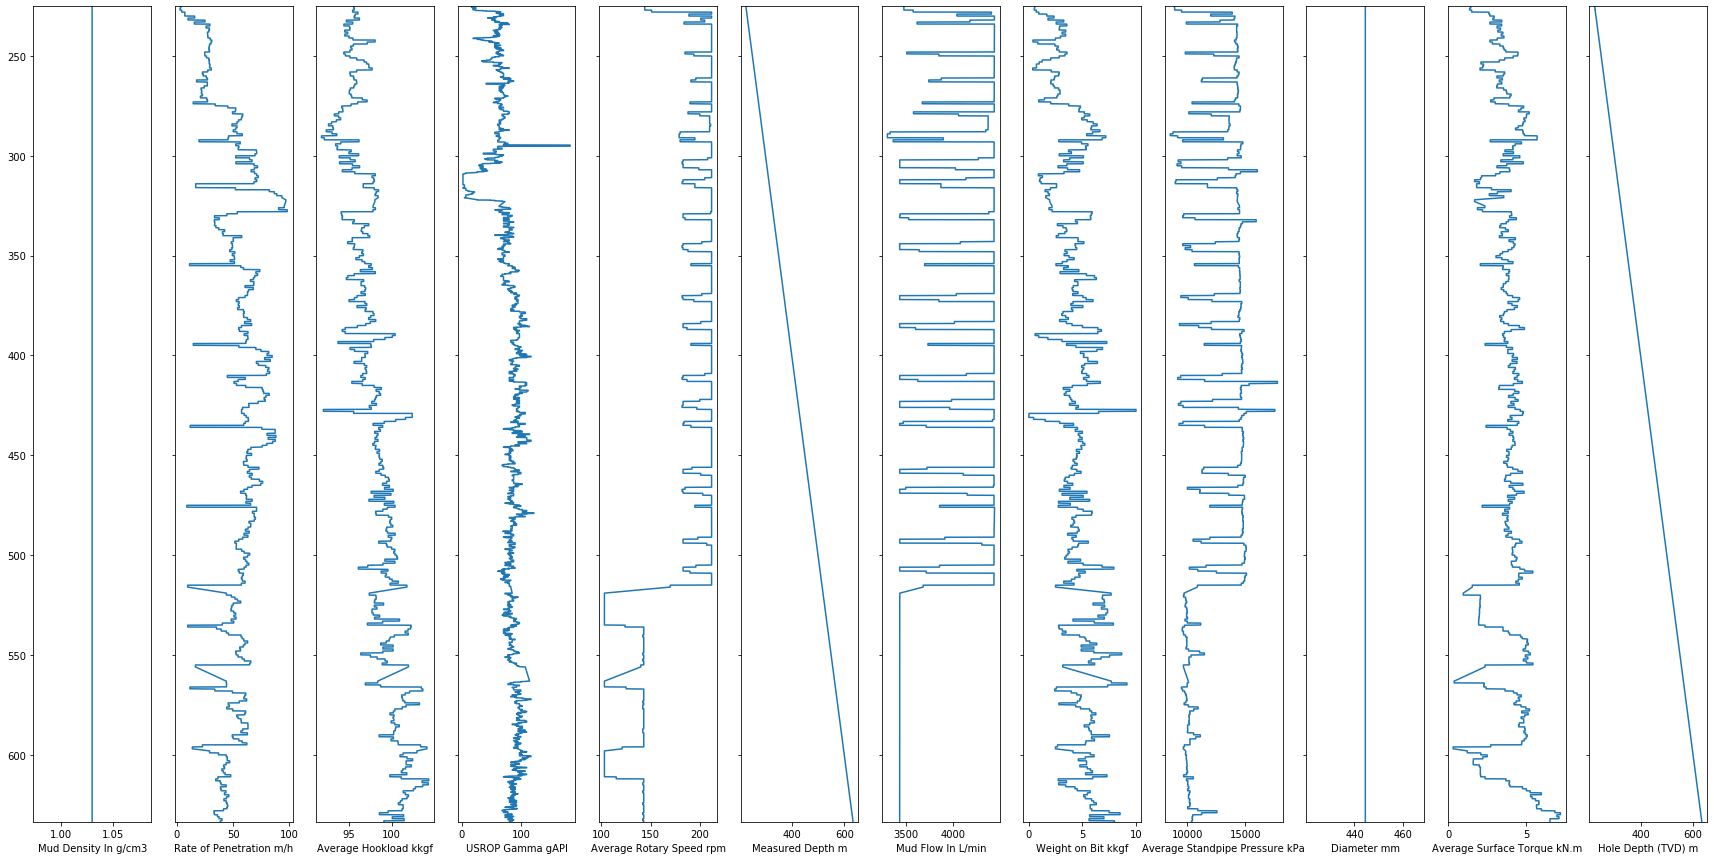

In [30]:
well_data = data[data['Well Identifier'] == wells[6]]
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

### Heat Maps for wells

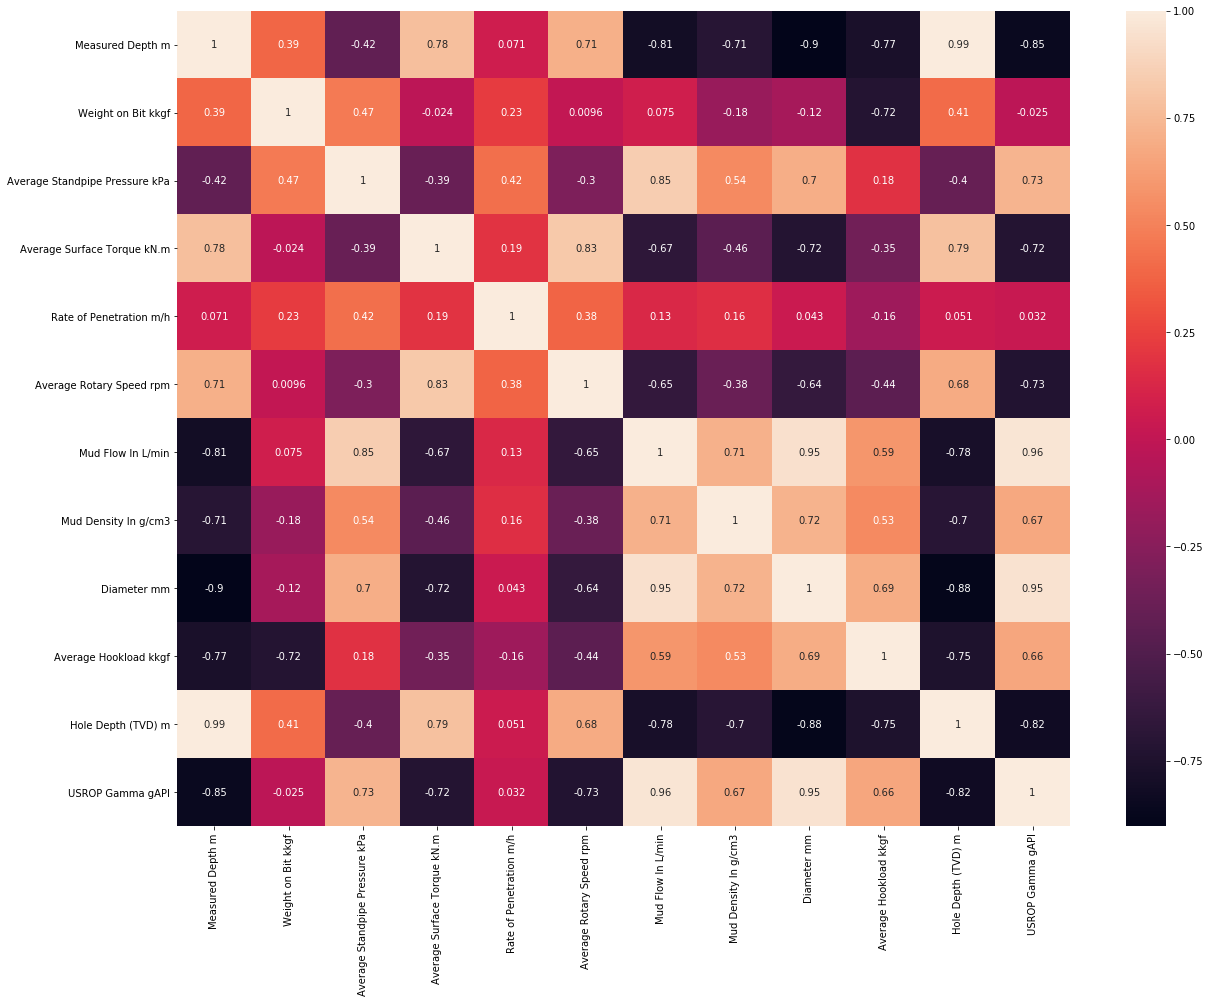

In [31]:
well_data = data[data['Well Identifier'] == wells[0]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

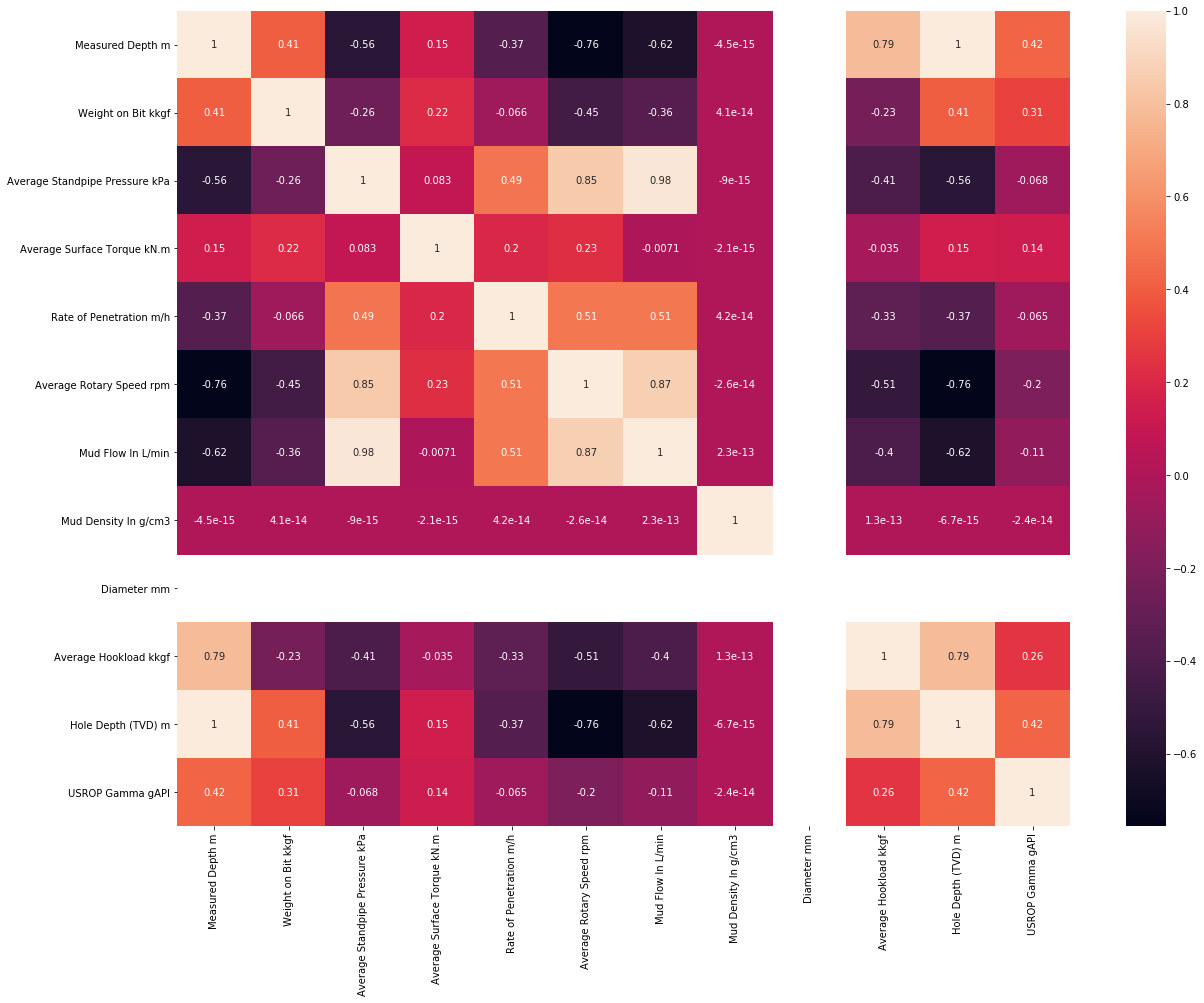

In [32]:
well_data = data[data['Well Identifier'] == wells[1]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

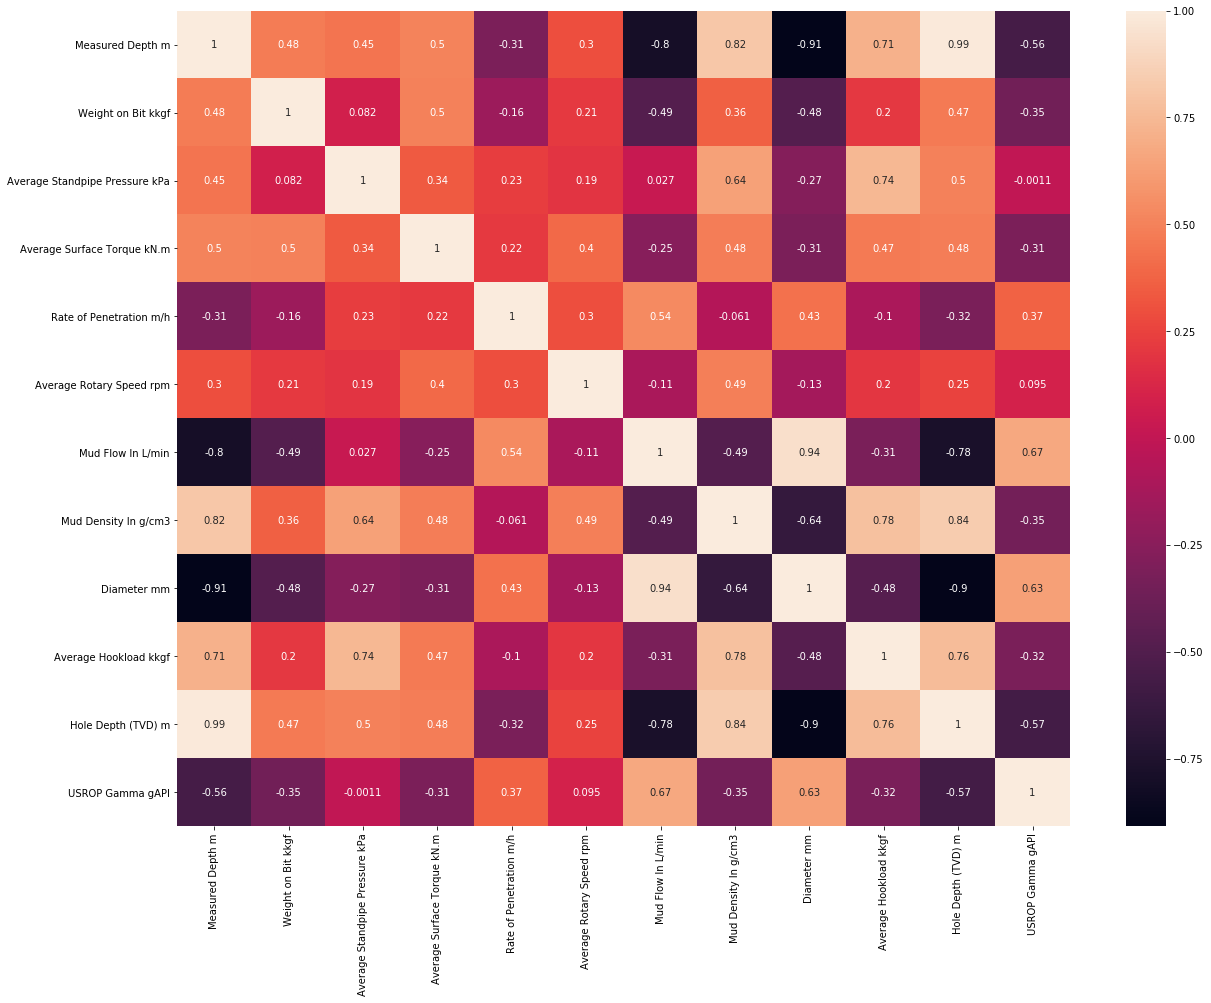

In [33]:
well_data = data[data['Well Identifier'] == wells[2]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

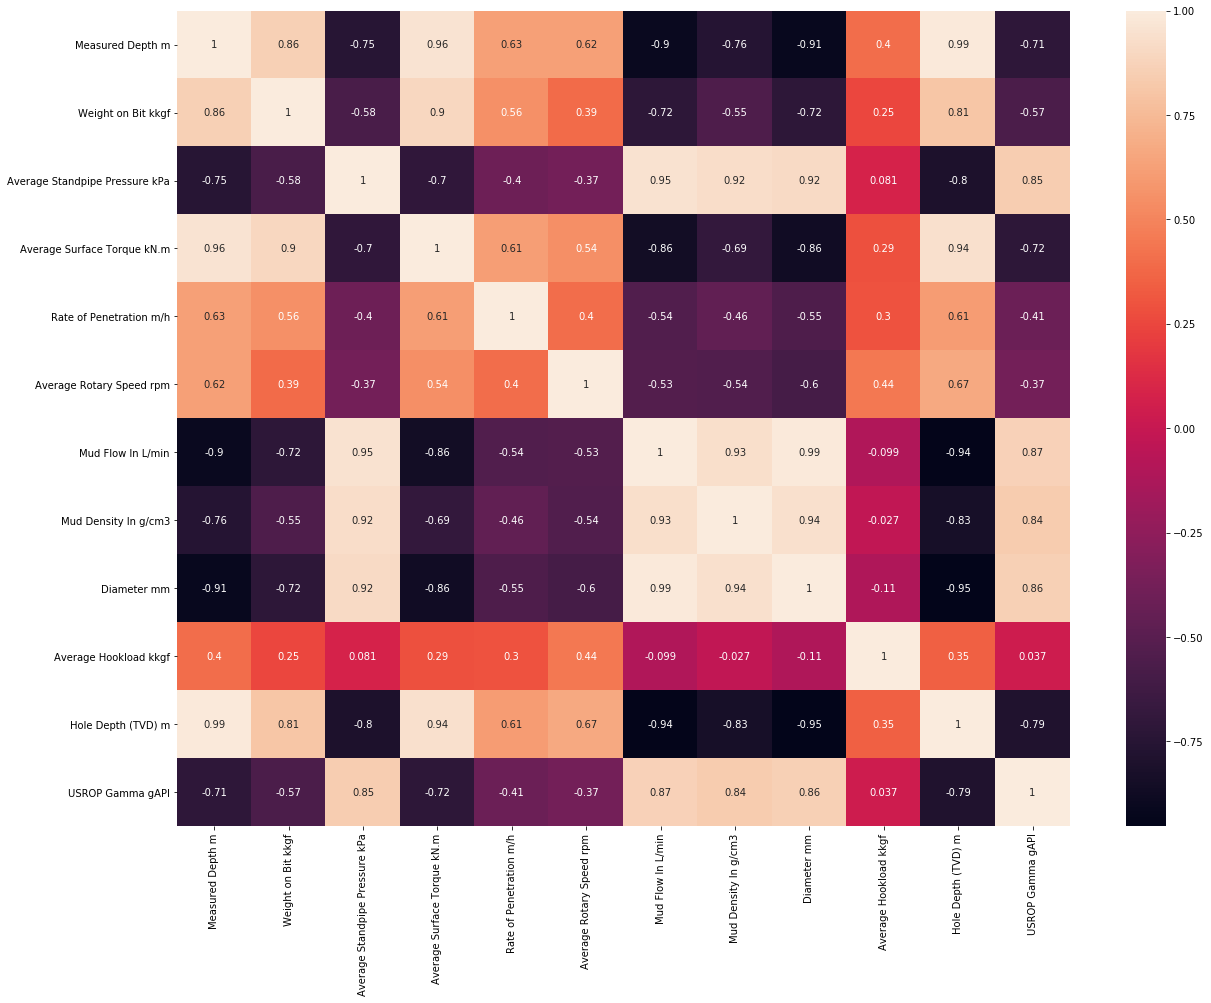

In [34]:
well_data = data[data['Well Identifier'] == wells[3]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

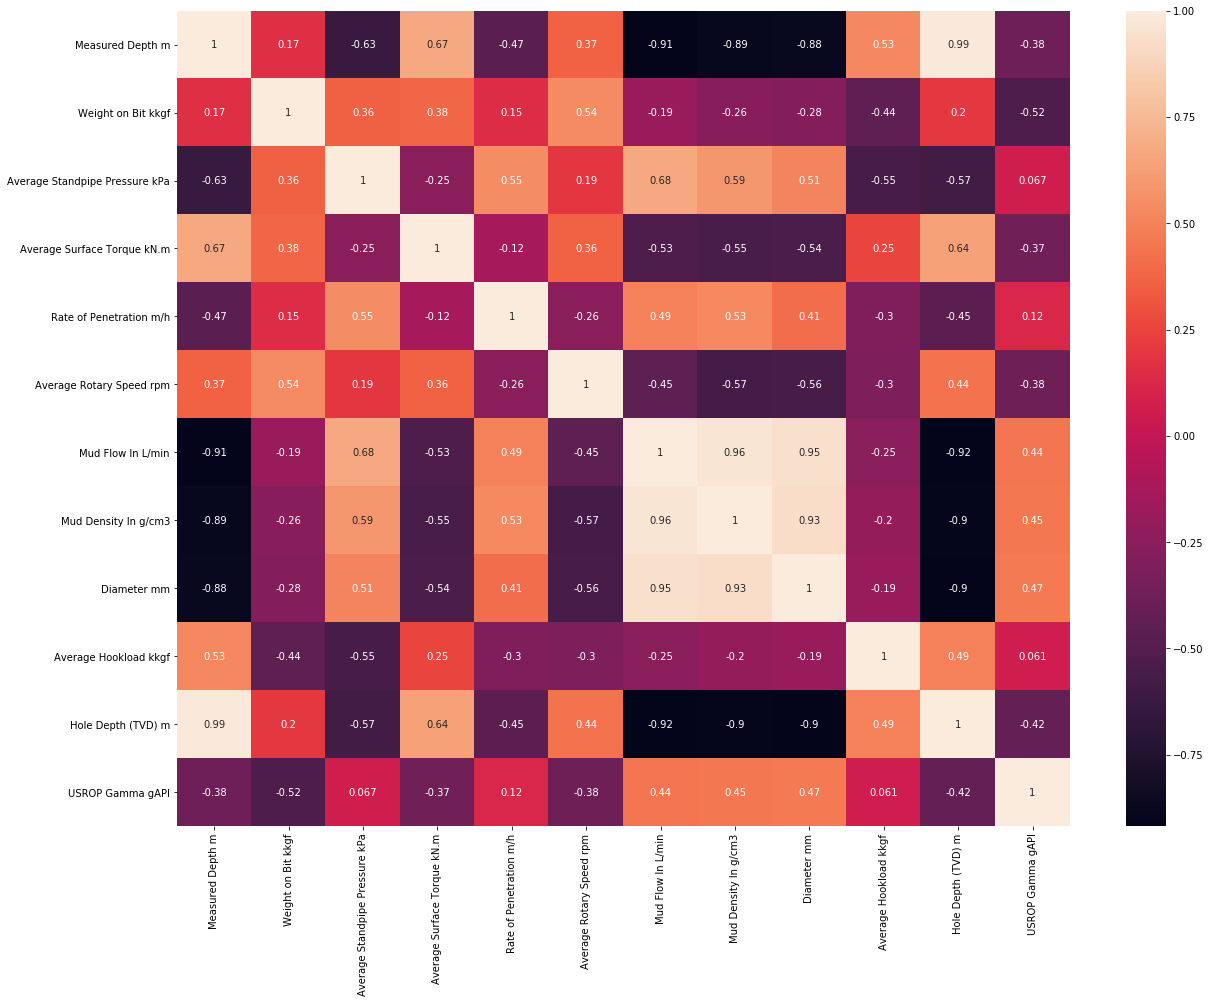

In [35]:
well_data = data[data['Well Identifier'] == wells[4]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

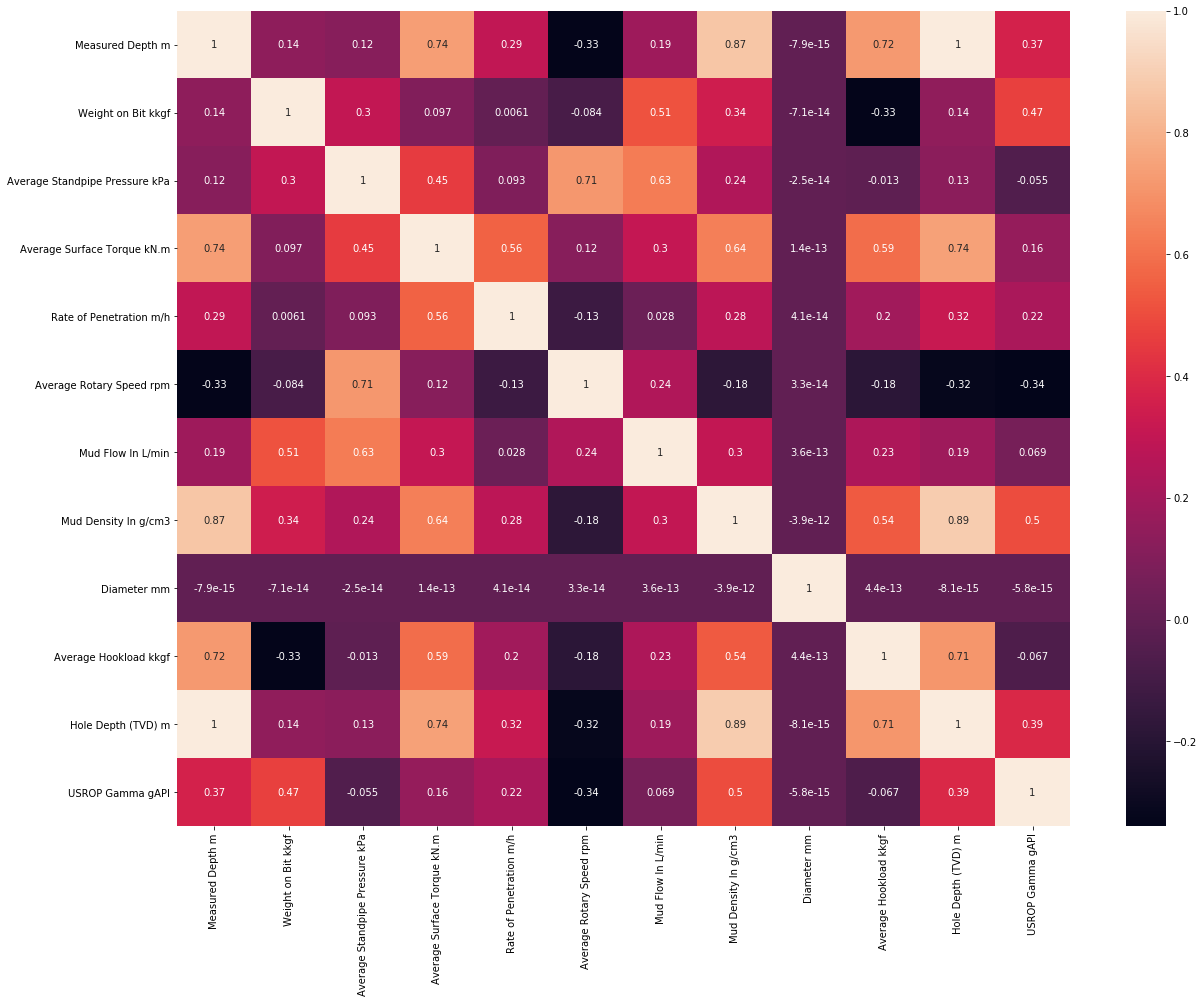

In [36]:
well_data = data[data['Well Identifier'] == wells[5]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

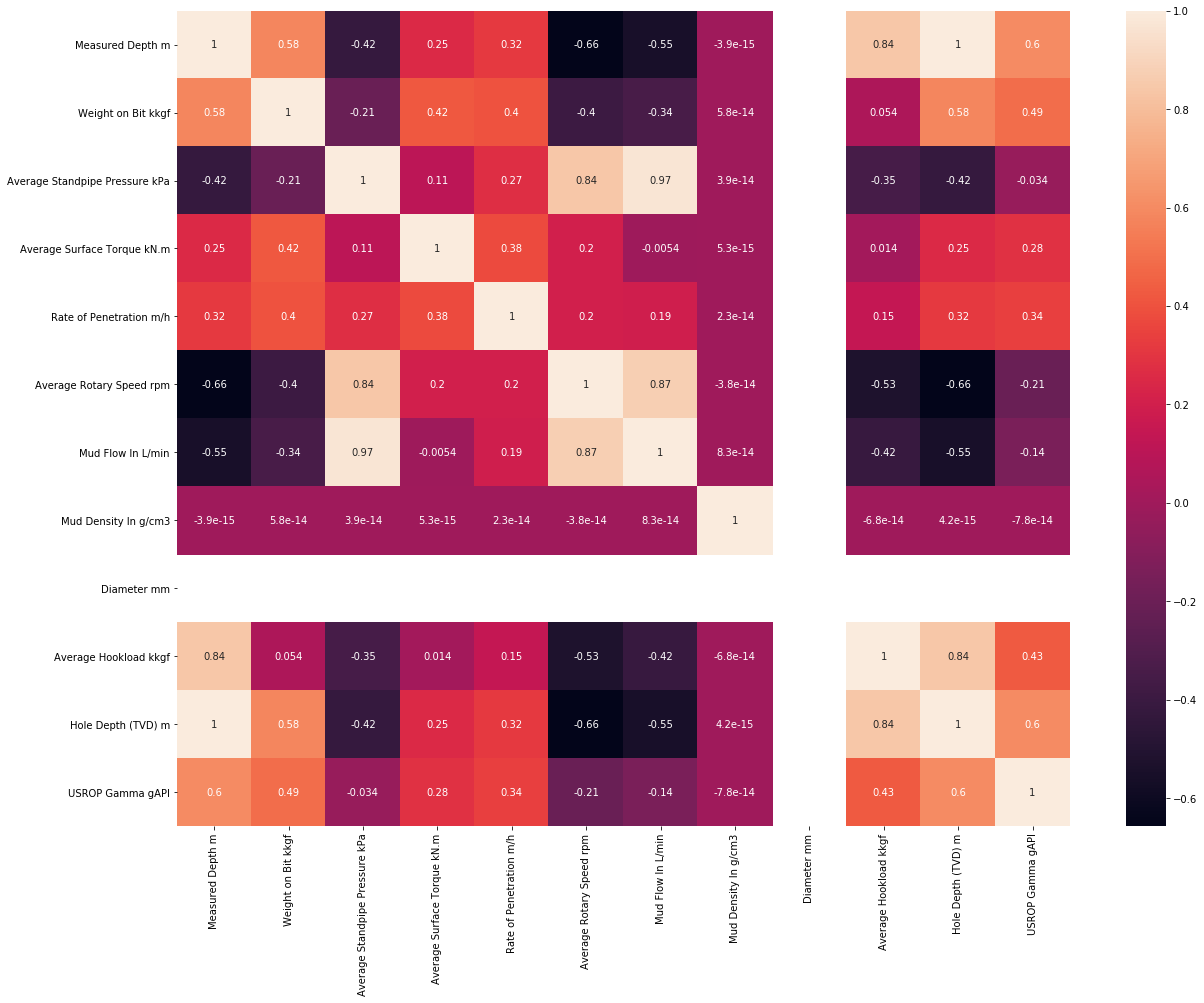

In [37]:
well_data = data[data['Well Identifier'] == wells[6]]
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

### Log graph and Heat Map for combined Data

(633.536, 491.033)

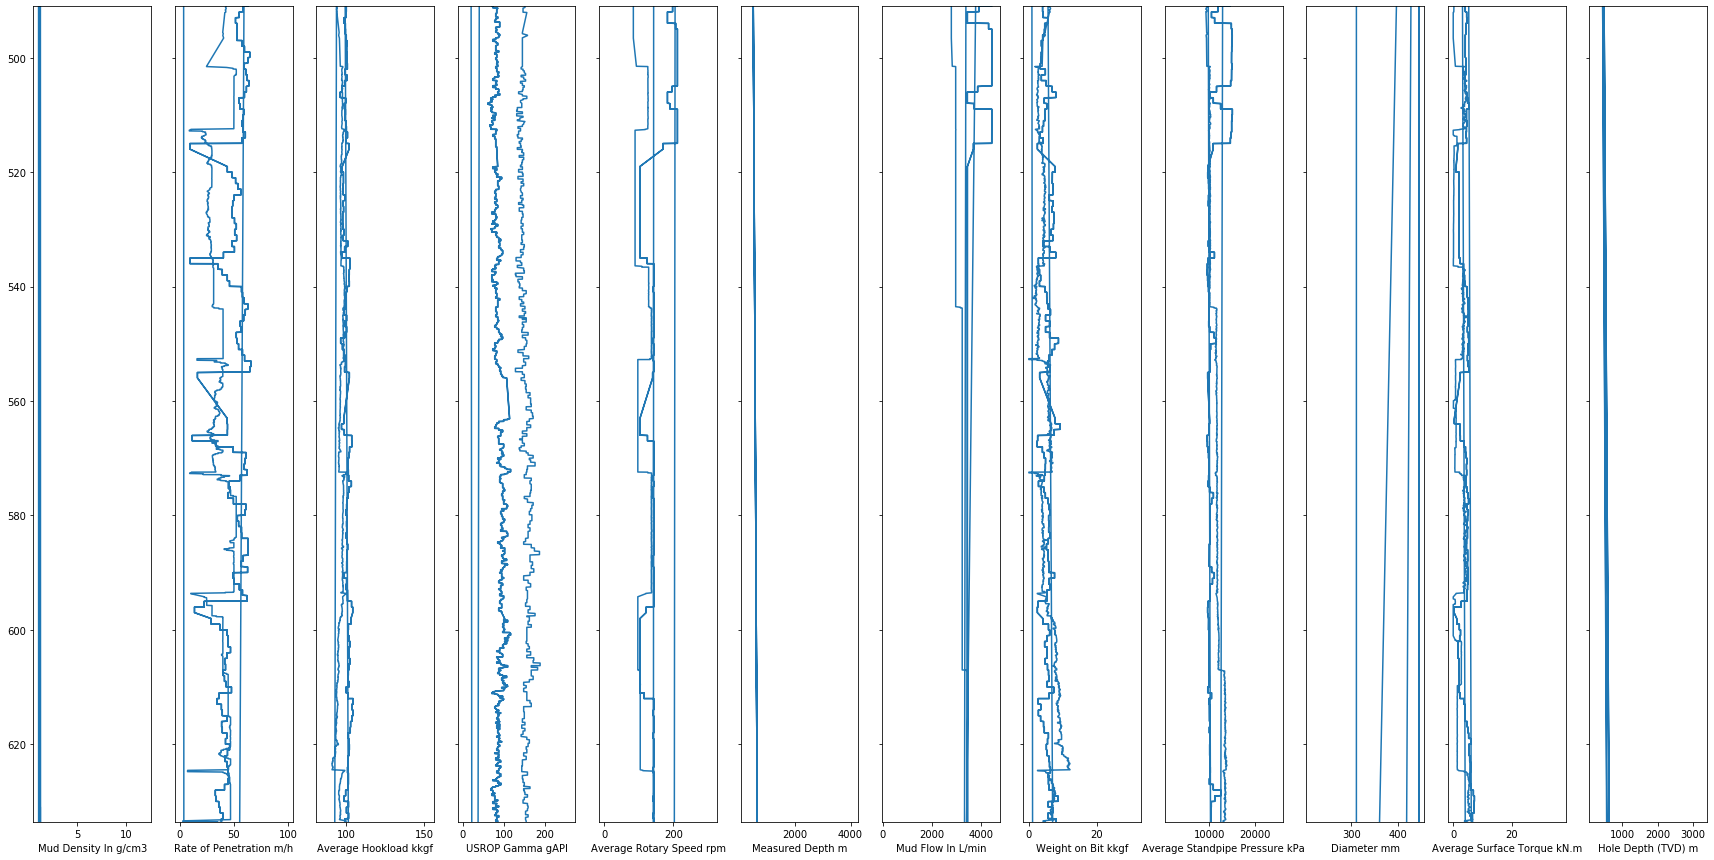

In [38]:
well_data = data
fig, axs = plt.subplots(1, len(well_data.columns)-1, figsize=(30, 15), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['Well Identifier'])):
 axs[ic].plot(well_data[col], well_data['Measured Depth m'])
 axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['Measured Depth m'].values[-1], well_data['Measured Depth m'].values[0])

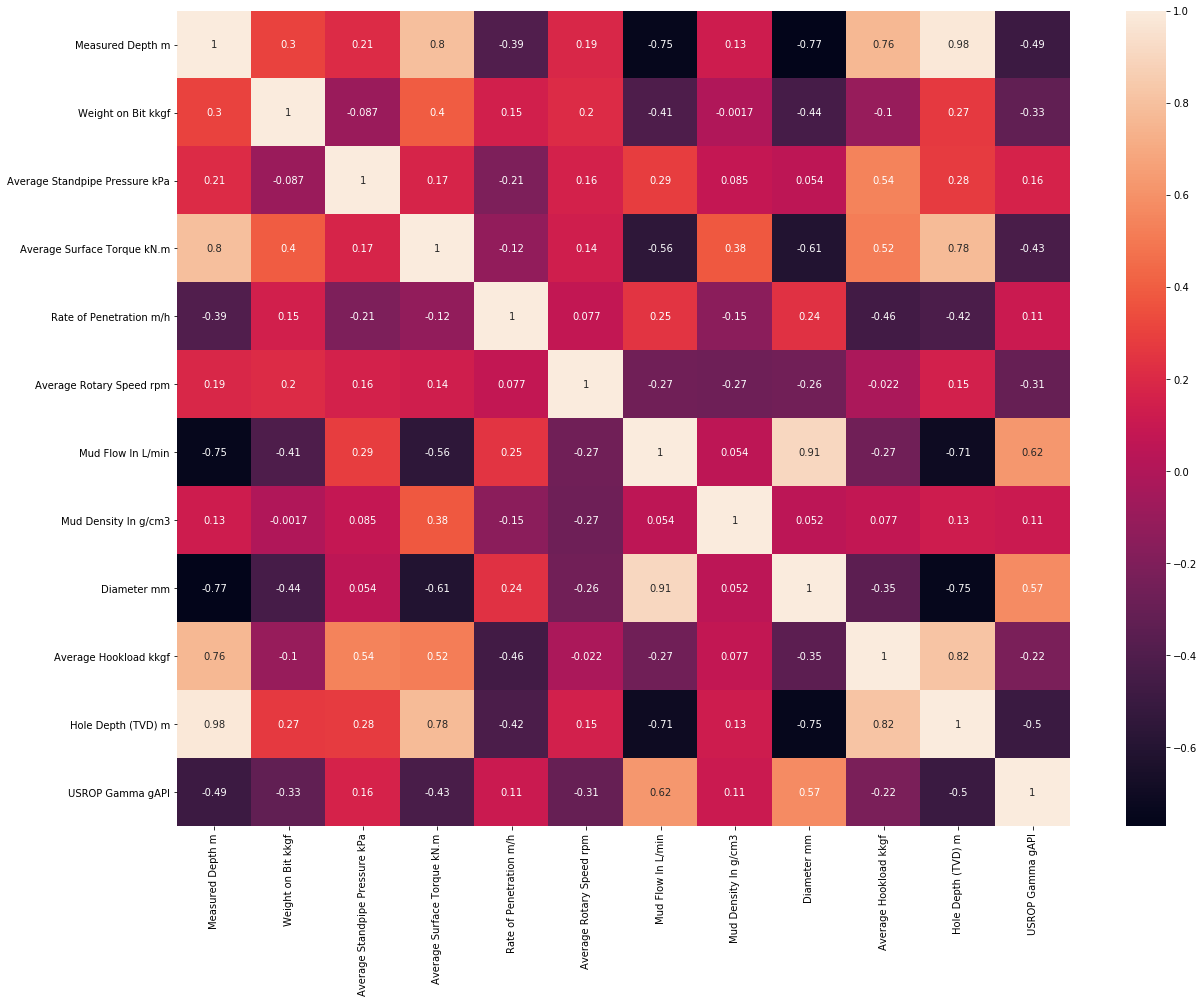

In [39]:
well_data = data
fig, axs = plt.subplots(figsize=(20,15), sharey=True)
axs = sb.heatmap(well_data.corr(), annot=True)

In [40]:
well_data.columns

Index(['Well Identifier', 'Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Rate of Penetration m/h', 'Average Rotary Speed rpm',
       'Mud Flow In L/min', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'Hole Depth (TVD) m', 'USROP Gamma gAPI'],
      dtype='object')

### Visualizing Co-Linearity

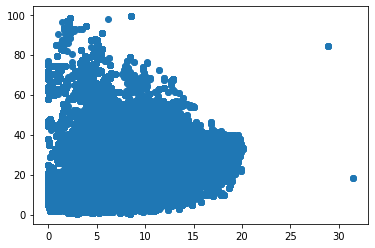

In [41]:
# check if there's any co-linearity between features
# you may check this for all of the features and see if there's any good finding. 
plt.scatter(data['Weight on Bit kkgf'], data['Rate of Penetration m/h'])

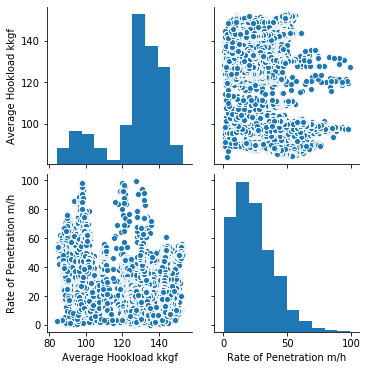

In [42]:
# another library from Seaborn to check the co-linearity
sb.pairplot(data[['Average Hookload kkgf', 'Rate of Penetration m/h']])

# **5. Build Machine Learning Models**

## Preparing data for training

In [43]:
X = data.drop(columns=['Well Identifier', 'Rate of Penetration m/h'])

In [44]:
y = data['Rate of Penetration m/h']

### Shuffle the data


In [45]:
X, y = shuffle(X, y, random_state=42)

In [46]:
X

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
95319,2886.816,11.920407,13747.38762,22.303205,139.736,2121.382739,10.849026,215.90,124.987378,2645.491178,7.350
99368,3024.293,6.128940,14811.55204,23.271259,139.736,2121.378954,11.182843,215.90,125.260440,2733.591790,14.002
131291,2012.594,5.333116,22280.20135,11.600000,124.140,3987.855834,1.450000,311.15,135.214376,1906.749552,103.520
162157,3748.516,3.304420,15244.43248,17.475138,179.505,1705.918630,1.310000,215.90,140.589594,2945.014786,57.565
97546,2966.128,3.889101,14624.13875,21.763590,139.736,2121.378954,11.182843,215.90,126.296899,2697.390998,9.994
...,...,...,...,...,...,...,...,...,...,...,...
119879,4014.792,16.772031,16404.12376,32.389135,139.736,2077.184268,11.266297,215.90,134.440243,3150.273506,67.673
103694,3170.837,1.850657,16055.68341,16.283374,139.736,2121.382739,11.182843,215.90,132.571442,2810.914978,27.000
131932,2058.619,5.863368,22478.97720,11.270001,140.000,3987.855834,1.460000,311.15,135.642655,1946.937432,85.330
146867,3062.280,8.187342,19464.93405,11.876965,234.380,2016.072577,1.320000,215.90,130.639139,2654.130125,9.370


### Scale the features

<b>As discussed there would only be four types of scaler suitable for the given problem</b>

In [47]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = PowerTransformer(method='yeo-johnson')

In [48]:
X.columns

Index(['Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Average Rotary Speed rpm', 'Mud Flow In L/min', 'Mud Density In g/cm3',
       'Diameter mm', 'Average Hookload kkgf', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

In [49]:
X = scaler.fit_transform(X)

### Split into train and test data
<b> Using random state as 4 because shuffling the data using this random state gave good results.</b>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Model Selection
I tried various models <b>RandomForestRegressor, DecisicionTreeRegressor, XGBoost, GradientBoostingRegressor, AdaBoostRegressor.</b> The most accurate came out to be <b>RandomForestRegressor</b> while testing on a completely new database.<hr>
As mentioned in the Journal by <b>Andrzej Tunkiel</b> the best model is according to his calculations is <b>GradientBoostingRegressor.</b> Though I have not been able to obtain such precision in my test data. 
<hr>
<b>But this can be verified that the least MAE or highest accuracy will be obtained Random Forest as mentioned in Journal.</b>

## HyperTuning

In [51]:
# Function to calculate Accuracy and MAE
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### RandomSearch CV
Note it take about 45 minutes on an average to build a single model. So, genration of 150 models will take about atleast 3 days.<br>
<b>During my computation I used Kaggle 10 notebooks simultaneously for few days to fasten the whole process.</b>

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = list(range(10,40,5))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Minimum number of samples required to split a node
min_samples_split = list(range(2,10,1))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,10,1))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion = ['mae']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion,
               'n_jobs' : [-1]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=4, random_state=42, return_train_score=True, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(rf_random.cv_results_)
results

#### Visualizing the Results Produced by RandomSearchCV

In [ ]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.scatter(results["params"][i]["n_estimators"], results["mean_test_score"][i])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.scatter(results["params"][i]["min_samples_split"], results["mean_test_score"][i])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.scatter(results["params"][i]["min_samples_leaf"], results["mean_test_score"][i])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.scatter(results["params"][i]["max_features"], results["mean_test_score"][i])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.scatter(results["params"][i]["bootstrap"], results["mean_test_score"][i])
plt.show()

In [ ]:
results.to_csv('./standardScalar_randomCV_mae.csv')

In [ ]:
best_random = rf_random.best_estimator_
rf_random.best_params_

<b>It was noticed that the best output was achieved by Standard Scalar at n_estimators = 10, bootstrap = False, max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 6, criterion = "mae"</b>

Graph shows that peaks for the follwowing lie near :-
<ol>
    <li>bootstrap = "False"</li>
    <li>max_features = "sqrt" or "log2"</li>
    <li>min_samples_leaf = 1</li>
    <li>min_samples_split = 2 or 6</li>
    <li>n_estimators = 15 or >35</li>
</ol>

### GridSearchCV
Grid Search has 120 models to generate which will take about another 3 days to produce result.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3,6],
    'n_estimators': [13,15,17,19],
    'criterion' : ['mae'],
    'n_jobs' : [-1]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

## Inference obtained
It was noticed that the best accuracy was obtained with n_estimators = 17, bootstrap = False, max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 2, criterion = "mae"
<br>
{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 17,
 'n_jobs': -1}
 
 Model Performance
Average Error: 0.0454 degrees.
Accuracy = 99.76%.

<hr>
But the least MAE was achieved with<br>
{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 <b>'min_samples_split': 6</b>,
 'n_estimators': 17,
 'n_jobs': -1}

<hr>
<b>It was seen that least MAE recieved model didn't in recieve least MAE in test dataset of a completely different well.</b>

In [52]:
model = RandomForestRegressor(n_estimators=17, random_state=42, min_samples_split=6, min_samples_leaf=1, max_features='sqrt', bootstrap=False, criterion='mae', n_jobs = -1)

In [53]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=17, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Test model

In [54]:
y_pred_test = model.predict(X_test)

In [55]:
mean_absolute_error(y_test.values, y_pred_test)

0.07525118737145337

#### Save model and scaler to files

In [56]:
pickle.dump(model, open('model.pkl', 'wb'))

In [57]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In order to make it easy to run inference on new data, such as the open test dataset, it is recommended to wrap the initialization of the model, all preprocessing steps including normalization, treatment of outliers and removals of unused columns in a class or pipeline. There are many ways of doing this, one example being a class like below:

In [58]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['Measured Depth m','Weight on Bit kkgf','Average Standpipe Pressure kPa',
                             'Average Surface Torque kN.m','Average Rotary Speed rpm','Mud Flow In L/min',
                             'Mud Density In g/cm3','Diameter mm','Average Hookload kkgf','Hole Depth (TVD) m',
                             'USROP Gamma gAPI']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data. 

In [59]:
model = Model('model.pkl', 'scaler.pkl')

In [60]:
open_test_features = pd.read_csv('datasets/tech_challenge2021_test.csv')

In [61]:
open_test_features.head()

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,TC-2021-TW,365.150,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.124187,20.774
1,TC-2021-TW,365.303,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.276587,20.774
2,TC-2021-TW,365.455,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.428682,20.774
3,TC-2021-TW,365.608,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.581082,20.774
4,TC-2021-TW,365.760,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.733178,20.774


In [62]:
open_test_features.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [63]:
test_prediction = model.predict(open_test_features)

In [64]:
test_prediction

array([34.93697033, 34.93697033, 34.93697033, ..., 16.61275241,
       16.61275241, 16.61275241])

In [65]:
# Equate test_prediction == test_prediction_for_submission for submission
test_prediction_for_submission = model.predict(open_test_features)

In [66]:
test_prediction_for_submission 

array([34.93697033, 34.93697033, 34.93697033, ..., 16.61275241,
       16.61275241, 16.61275241])

In [67]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='Rate of Penetration', comments='', fmt='%f')

In [68]:
!pip freeze > requirements.txt

In [69]:
!conda env export > environment.yml


CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.

